In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Datos+Meteorológicos_Arg_2023.csv')

df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


In [3]:
df['Fecha']  = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()


,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [4]:
lista_ciudades = []

for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)

print(lista_ciudades)


['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


In [5]:
dict_meses = {1: 'Enero', 
              2: 'Febrero', 
              3: 'Marzo', 
              4: 'Abril', 
              5: 'Mayo', 
              6: 'Junio', 
              7: 'Julio', 
              8: 'Agosto', 
              9: 'Septiembre', 
              10: 'Octubre', 
              11: 'Noviembre', 
              12: 'Diciembre'}

Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
Meses disponibles:  dict_values(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])


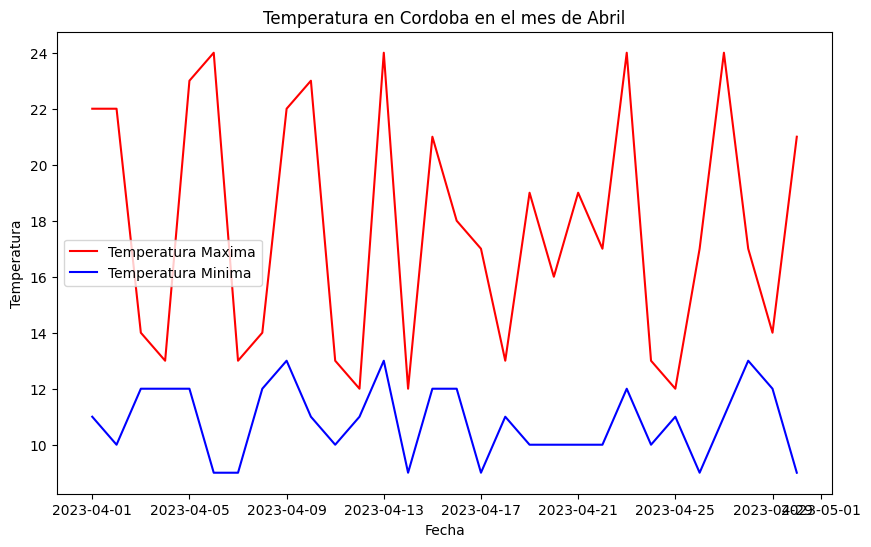

In [7]:
def consultar_temperatura():
    while True:
        # Seleccionar ciudad
        print('Ciudades disponibles: ', lista_ciudades)
        ciudad = input('Ingrese el nombre de la ciudad: ')
        
        # Seleccionar mes
        print('Meses disponibles: ', dict_meses.values())
        mes = int(input('Ingrese el numero del mes: '))
        
        # Validar ciudad y mes
        if ciudad not in lista_ciudades or mes not in dict_meses.keys():
            print('Ciudad o mes no validos')
            continue
        
        # Crear el dataframe con los datos de la ciudad y mes
        df_ciudad_mes = df[(df['Ciudad'] == ciudad) & (df['Fecha'].dt.month == mes)]
        
        # Graficar la temperatura
        plt.figure(figsize=(10, 6))
        plt.plot(df_ciudad_mes['Fecha'], df_ciudad_mes['Temperatura Maxima'], label='Temperatura Maxima' , color='red')
        plt.plot(df_ciudad_mes['Fecha'], df_ciudad_mes['Temperatura Minima'], label='Temperatura Minima', color='blue')
        plt.xlabel('Fecha')
        plt.ylabel('Temperatura')
        plt.title(f'Temperatura en {ciudad} en el mes de {dict_meses[mes]}')
        plt.legend()
        plt.show()
        
        # Preguntar si desea consultar otra ciudad o mes
        respuesta = input('¿Desea consultar otra ciudad o mes? (s/n): ')
        if respuesta.lower() == 'n':
            break

consultar_temperatura()